<a href="https://colab.research.google.com/github/alfonsocude/MACHINE-LEARNING-1/blob/main/13-Introduccion_al_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# **Introducción al Machine Learning**

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/alfonsocude/MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False);  

In [2]:
from IPython.display import Image

## **<font color='blue'>Definición</font>**

El aprendizaje de máquina  (En inglés: Machine Learning (ML)) es una rama de la inteligencia artifical enfocada al estudio de sistemas que pueden "aprender" a partir de datos. De acuerdo con [1], ML son un conjunto de métodos que pueden detectar automáticamente patrones en un conjunto de datos, aprenderlos y luego usarlos para predicir datos futuros o realizar otro tipo de decisiones bajo incertidumbre.

### **Ejemplos de aplicaciones de ML:**
<ul>
<li>Reconocimiento de Caracteres escritos a mano </li>
</ul>

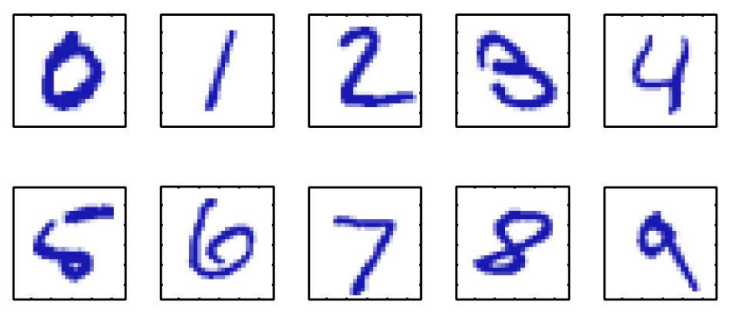

In [3]:
Image("local/imgs/HR.png", width = 400, height = 200)

<li>Reconocimiento de Rostros</li>

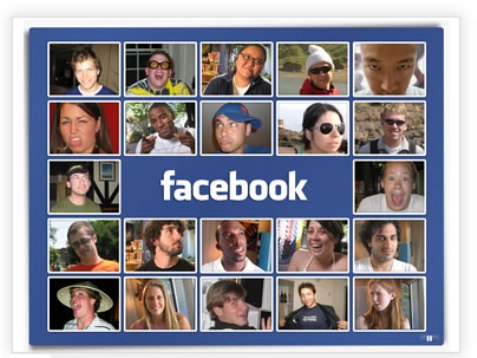

In [4]:
Image("local/imgs/facebook-photo.jpeg")

<li>Reconocimiento de objetos</li>

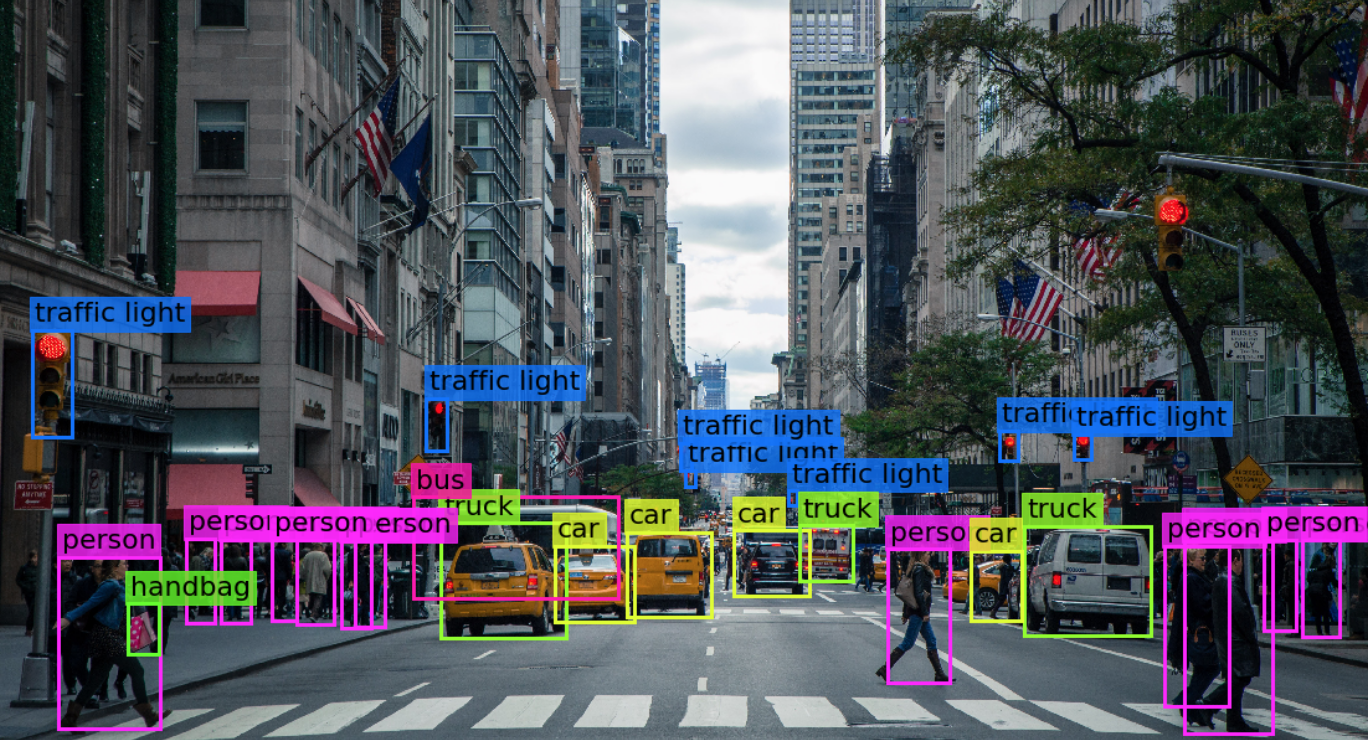

In [5]:
Image("local/imgs/Computer-Vision1.png")

<li>Reconocimiento de voz</li>

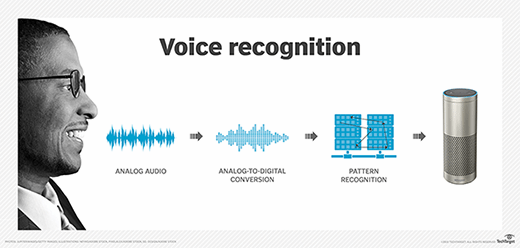

In [6]:
Image("local/imgs/voice_recognition_mobile.png")

<li>Traducción</li>

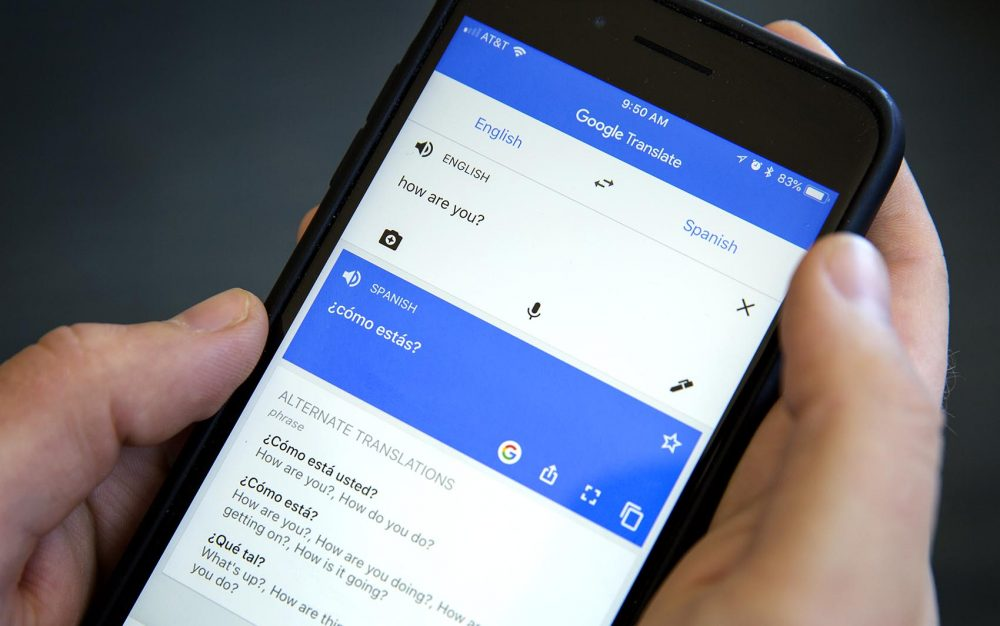

In [7]:
Image("local/imgs/translate.jpg", width = 600, height = 300)

y muchas otras...

# **Modelos a partir de datos**

### Aproximación mecanicista:

Cuando se conocen los principios físicos o las leyes que rigen la interacción entre las variables del problema y que producen la salida objetivo de predicción.

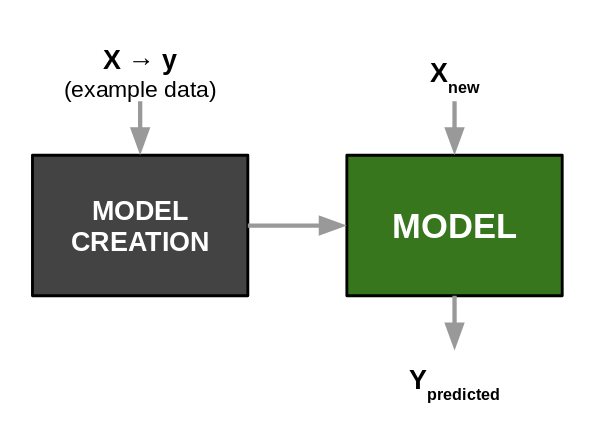

In [8]:
Image("local/imgs/Model.png", width = 400, height = 200)

### Aproximación en Machine Learning:

Cuando se desconocen las leyes que rigen las relaciones entre las variables y se tratan de descubir a patir de los datos mismos, usando un enfoque correlacional.

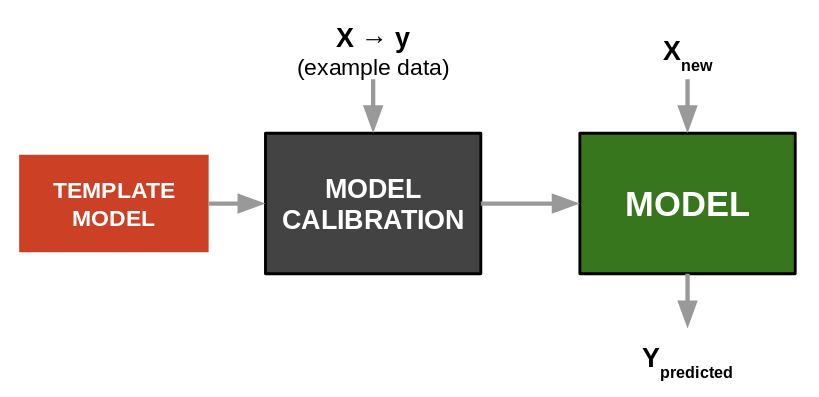

In [9]:
Image("local/imgs/Model2.png", width = 600, height = 300)

Las plantillas (templates) son entonces los diferentes modelos y algoritmos de machine learning que encontramos en la literatura y en las librerías y frameworks para el entrenamiento de sistemas basados en ML.

### <font color='red'>La calibración dependerá de la muestra de datos con que se cuente!</font> 

In [10]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)

In [55]:
d1.pdf(6)

0.02699548325659403

frontera óptima en 13.15


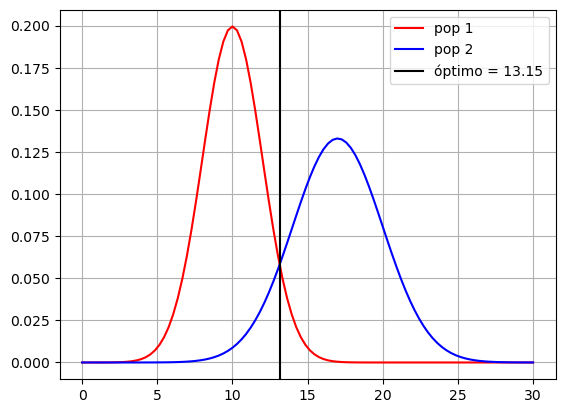

In [11]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.grid()
plt.legend();

#### Caso real: Tenemos una muestra de los datos

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera quisiéramos obtener?

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    fig, axs = plt.subplots(1, 2,figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        
        estimator = DecisionTreeClassifier(max_depth=2)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
            
        axs[0].plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        axs[0].plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        axs[0].scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        axs[0].scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
        #-----------------------------------------
        estimator = GaussianNB()
        estimator.fit(X,y)
        yr = estimator.predict(Xr)     
        axs[1].plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        axs[1].plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        axs[1].scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        axs[1].scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100) 
    axs[1].axis("off")
    axs[1].set_title('Plantilla de modelo 2')
    axs[0].axis("off")
    axs[0].set_title('Plantilla de modelo 1')

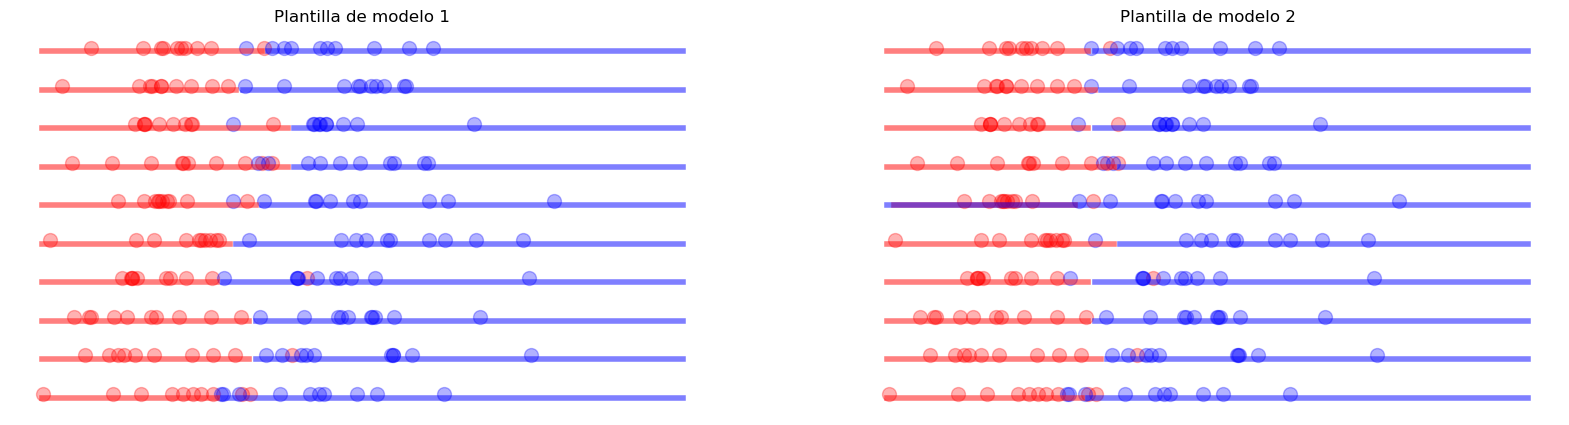

In [57]:
show_1D_dataset_samples(10, dot_alpha=.3)

#### Algunas conclusiones:

- La frontera cambiará de forma dependiendo de la "plantilla" de modelo que se use. 
- La frontera cambiará de ubicación si cambia la muestra, entre más datos se tengan, menos variación se obtendrá.
- En problemas reales el número de características aumenta y los problemas no se pueden visualizar directamente, por lo que se deben usar metodologías que permitan saber si el modelo seleccionado y el conjunto de datos, son suficientes.

## **<font color='blue'> ¿Qué implica resolver un problema de ML? </font>**

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca en **calibrar modelos** respecto a unos datos concretos.

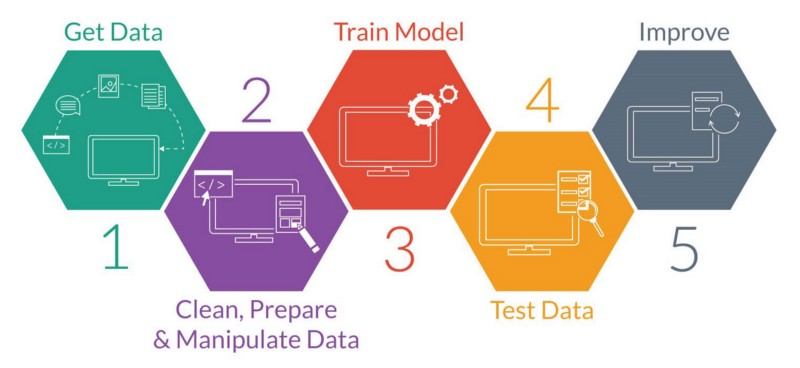

In [14]:
Image("local/imgs/ML_user.jpeg", width = 600)

Cuando el problema que queremos resolver no es estándar, o la solución que nos proporcionan los modelos convencionales no satisface los requerimientos del problema, debemos entrar en el rol de **diseñador** y proponer los ajustes necesarios o incluso un nuevo modelo para el problema de interés.

## **Tipos de Aprendizaje de Máquina**

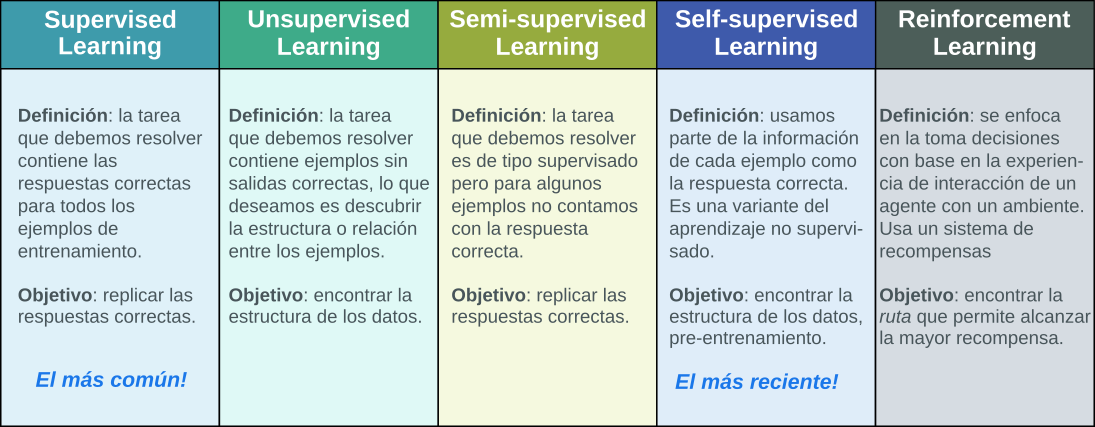

In [15]:
Image("local/imgs/ML_types.png", width = 800)

### Formalmente...

## **Aprendizaje predictivo o supervisado (Supervised Learning)**

En el cual el objetivo es aprender un mapeo a partir de entradas ${\bf{x}} = [x_1,x_2,\cdots,x_d]$ a salidas $t$, dado un conjunto de pares entrada-salida etiquetados $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i, t_i \right) \right\rbrace _{i=1} ^{N}$. En este caso $\mathcal{D}$ se conoce como el <b>conjunto de entrenamiento</b> y $N$ es el número de muestras de entrenamiento.

En una forma simple, cada muestra de entrenamiento ${\bf{x}}_i$ es un vector de números $d$-dimensional que representa variables o medidas del sistema o fenómeno que se desea modelar y que en el contexto del aprendizaje de máquinas es común llamarlas <b>características</b> (en inglés <b>features</b>).

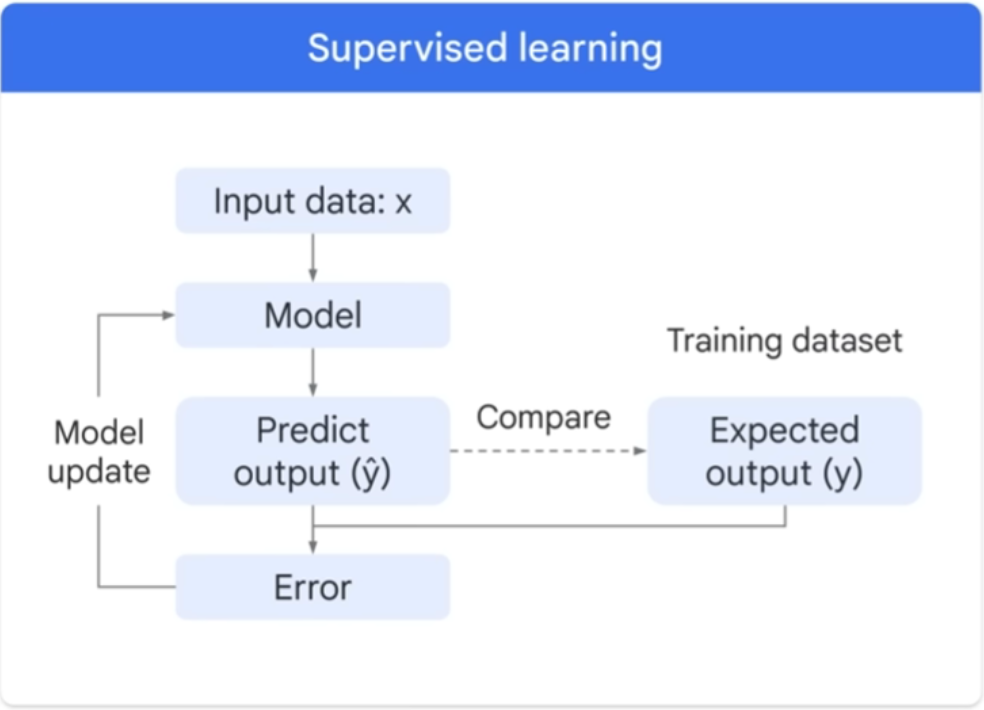

In [29]:
Image("local/imgs/Selección_036.png", width = 1000, height = 600)

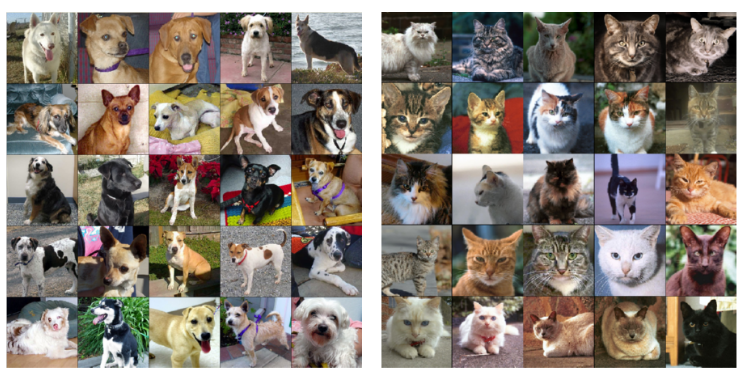

In [16]:
Image("local/imgs/Supervised.png", width = 600)

## **Descriptivo o no supervisado (Unsupervised Learning)**

En este caso unicamente se cuenta con un conjunto $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i \right) \right\rbrace _{i=1} ^{N}$; y el objetivo es encontrar "patrones interesantes" en los datos. Algunas veces se le llama <b>Descubrimiento de conocimiento</b>

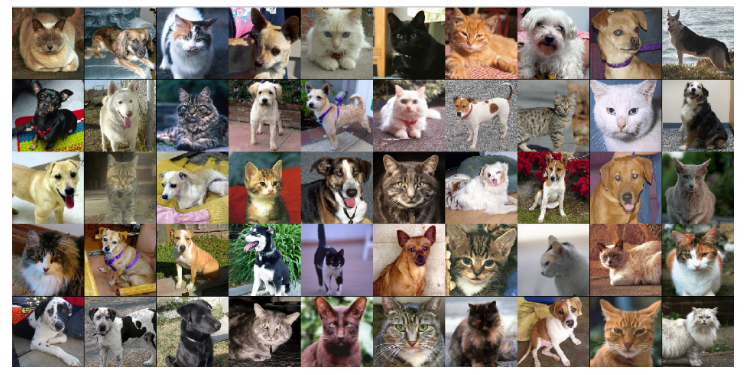

In [17]:
Image("local/imgs/Unsupervised.png", width = 600)

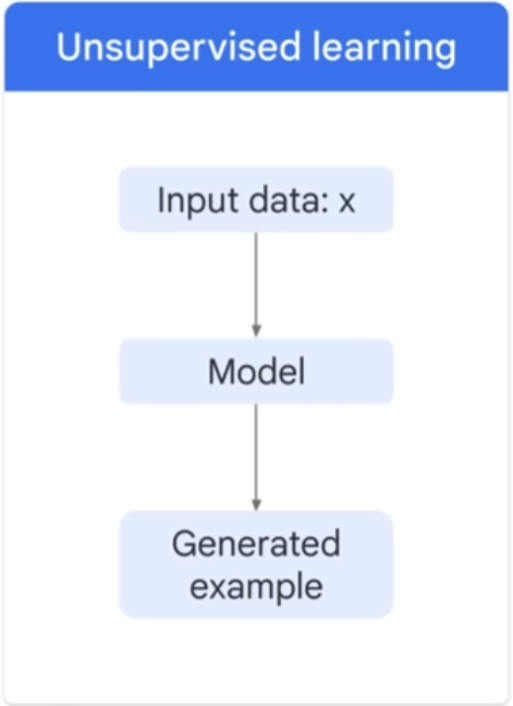

In [31]:
Image("local/imgs/Selección_037.png", width = 800, height = 600)

El aprendizaje se puede realizar en muchos tipos de objetos:

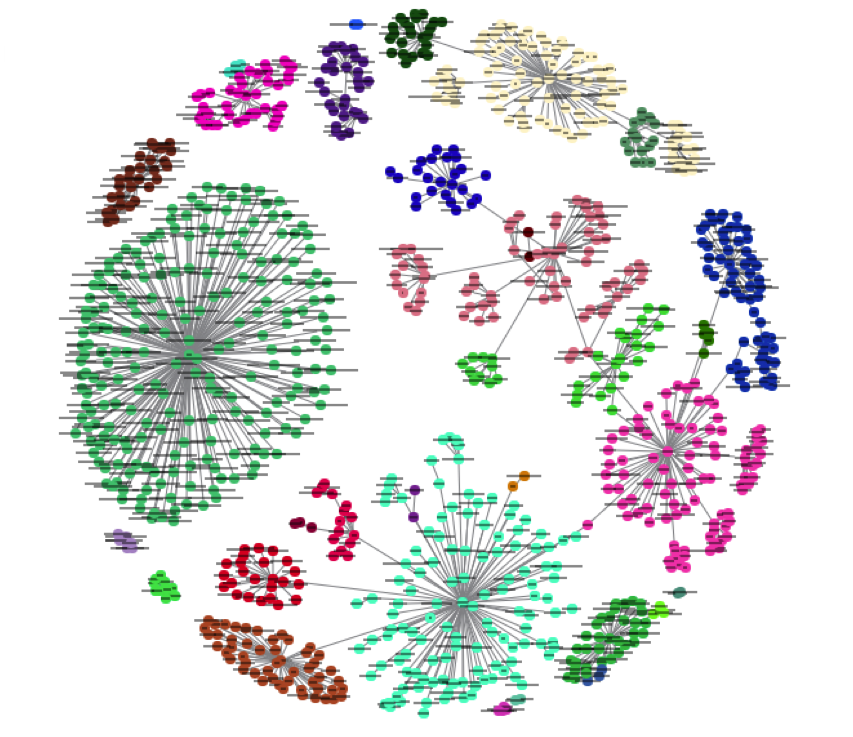

In [18]:
Image("local/imgs/Clustering.png", width = 600, height = 300)

## **Definición de Inteligencia Artificial Generativa**
Es un tipo de tecnología de Inteligencia Artificial que se enfoca en la generación de contenido original a partir de datos existentes. Utiliza algoritmos y redes neuronales avanzadas para aprender de textos e imágenes, y luego generar contenido nuevo y único.

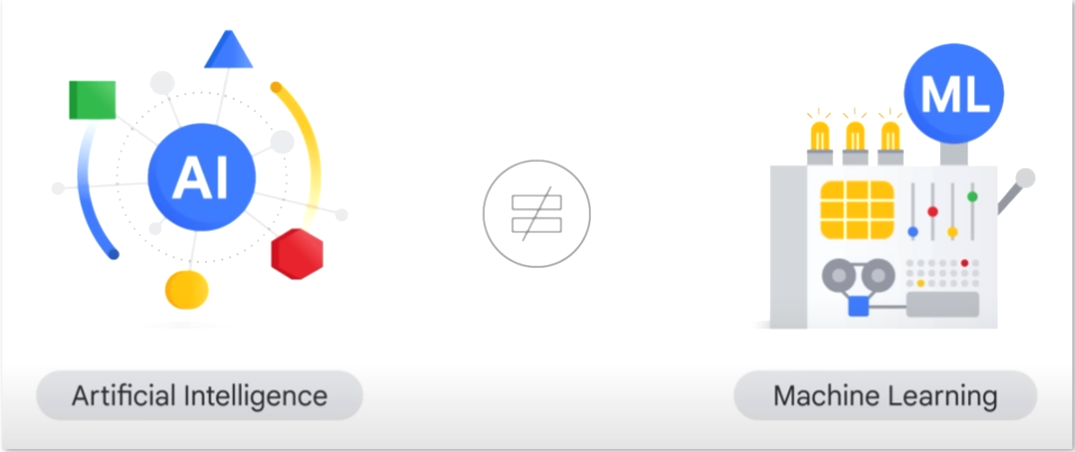

In [23]:
Image("local/imgs/Selección_034.png", width = 1000, height = 600)

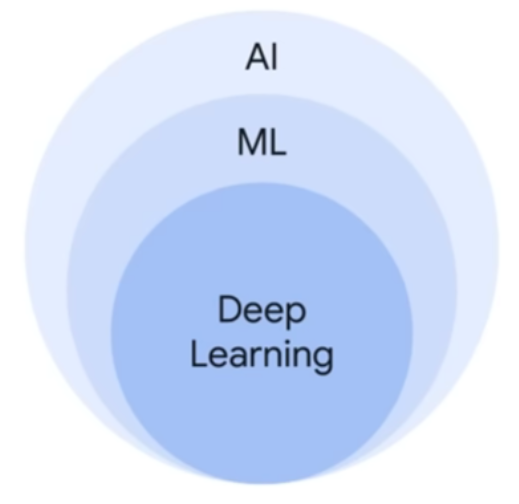

In [28]:
Image("local/imgs/Selección_035.png", width = 500, height = 400)

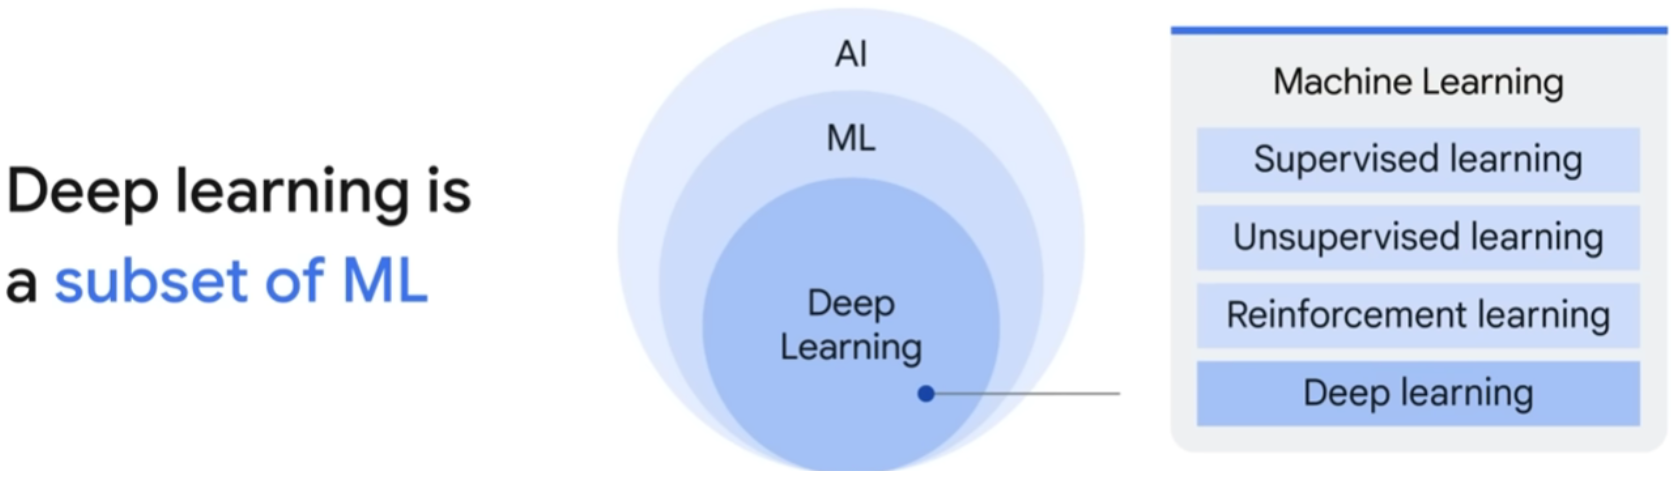

In [32]:
Image("local/imgs/Selección_038.png", width = 1000, height = 600)

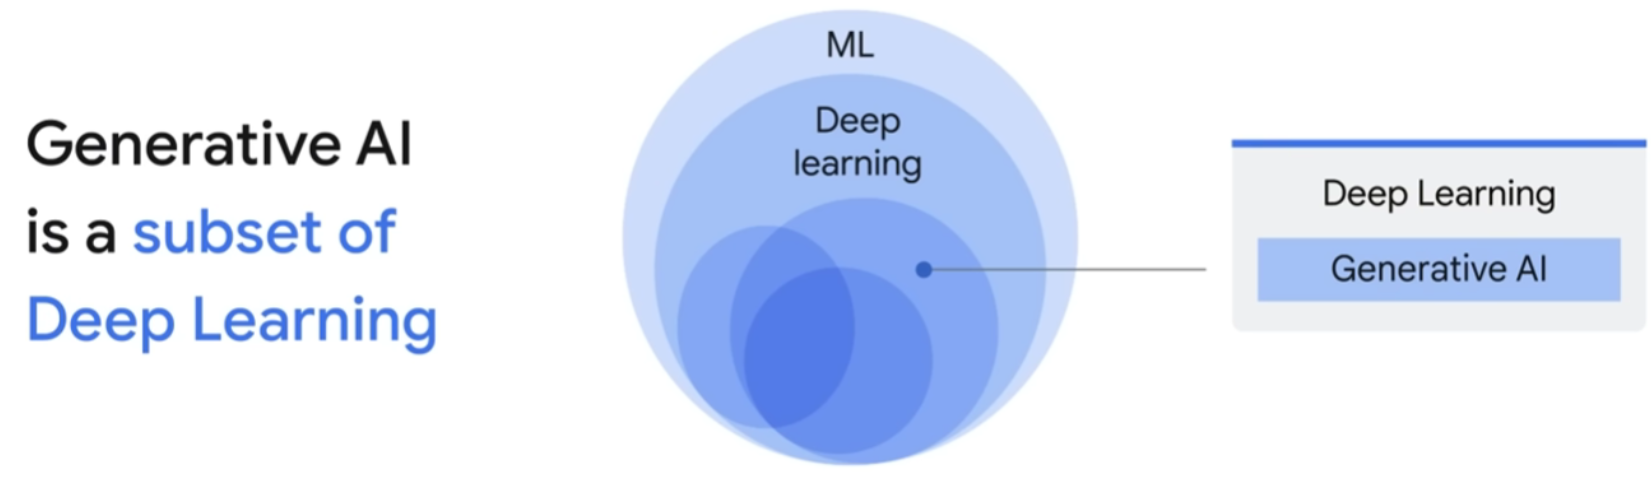

In [33]:
Image("local/imgs/Selección_039.png", width = 1000, height = 600)

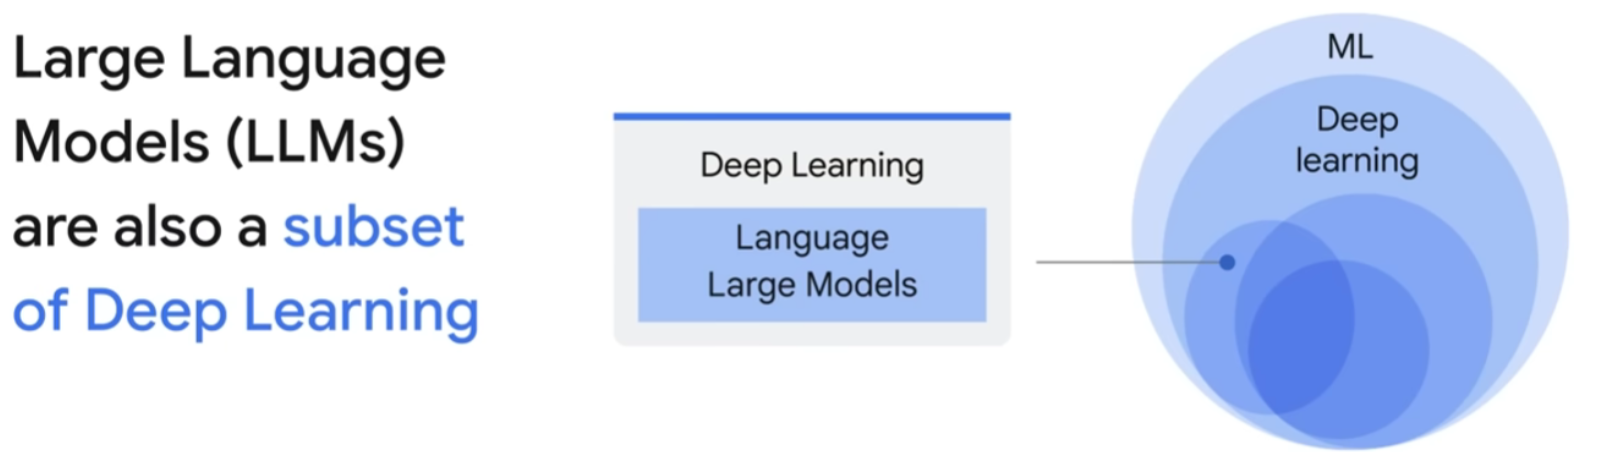

In [34]:
Image("local/imgs/Selección_040.png", width = 1000, height = 600)

## **Tipos de modelos de Deep Learning**
Discriminativo:
- Se utiliza para clasificar o predecir
- Típicamente entrenada en un conjunto de datos de datos etiquetados
- Aprende la relación entre las características de los puntos de datos y las etiquetas


Generativo:
- Genera nuevos datos que son similares a los datos con los que fue entrenado
- Comprende la distribución de datos y la probabilidad de que sea un ejemplo determinado 
- Predice la siguiente palabra en una secuencia


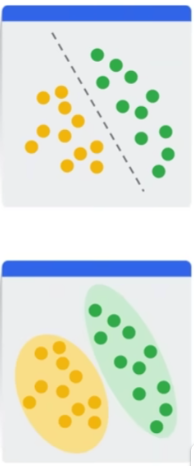

In [38]:
Image("local/imgs/Selección_041.png", width = 300, height = 200)

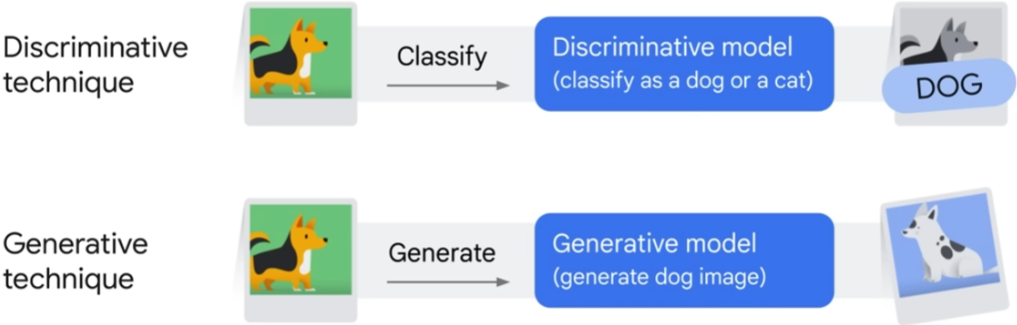

In [45]:
Image("local/imgs/Selección_042.png", width = 1000, height = 600)

## **¿Cómo trabaja la GenAI?**

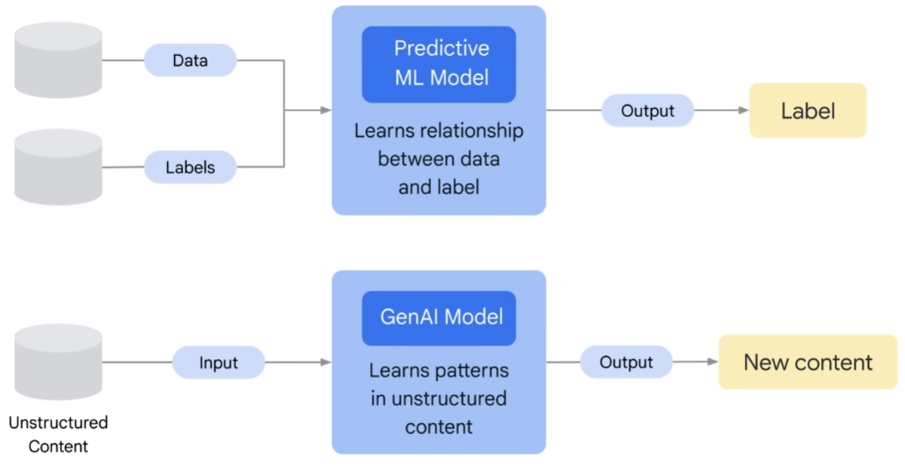

In [44]:
Image("local/imgs/Selección_043.png", width = 1000, height = 600)

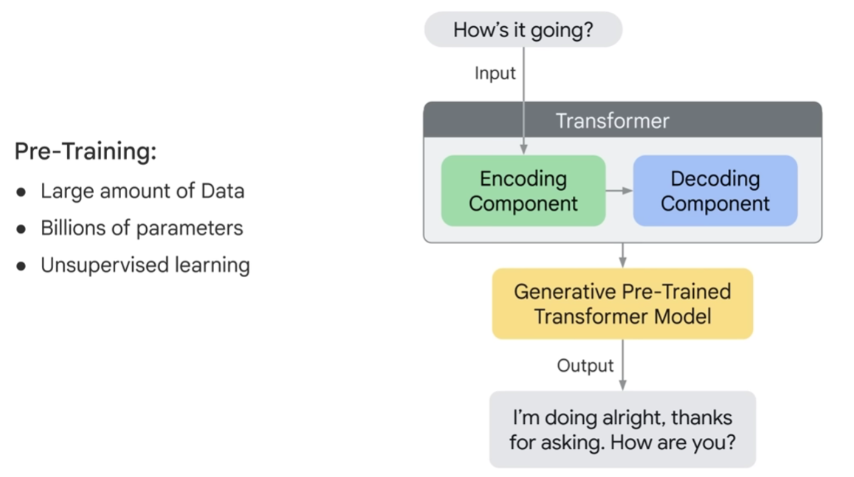

In [46]:
Image("local/imgs/Selección_044.png", width = 1000, height = 600)

## **Distinción entre la GenAI y la No GenAI**

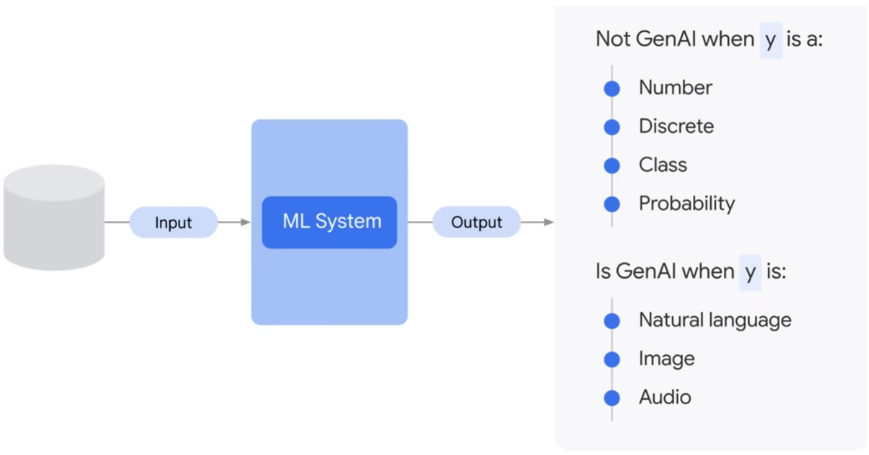

In [47]:
Image("local/imgs/Selección_045.png", width = 800, height = 200)

## **Construcción de una GenAI**

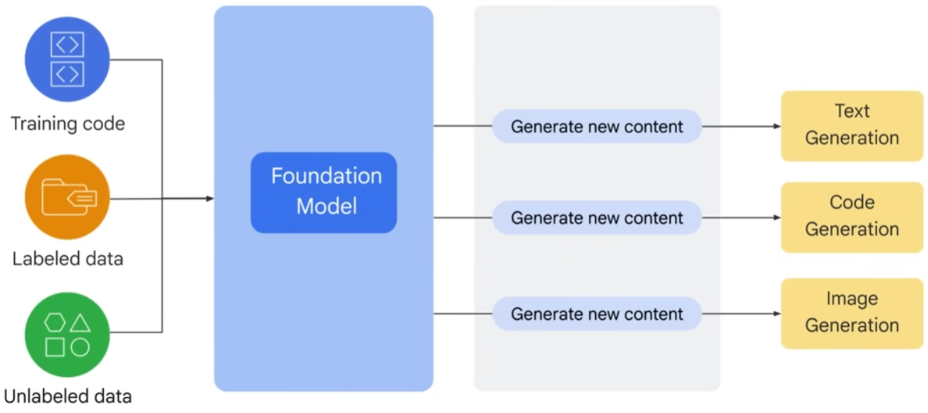

In [48]:
Image("local/imgs/Selección_046.png", width = 1000, height = 600)

## **Ejemplo de GenAI**

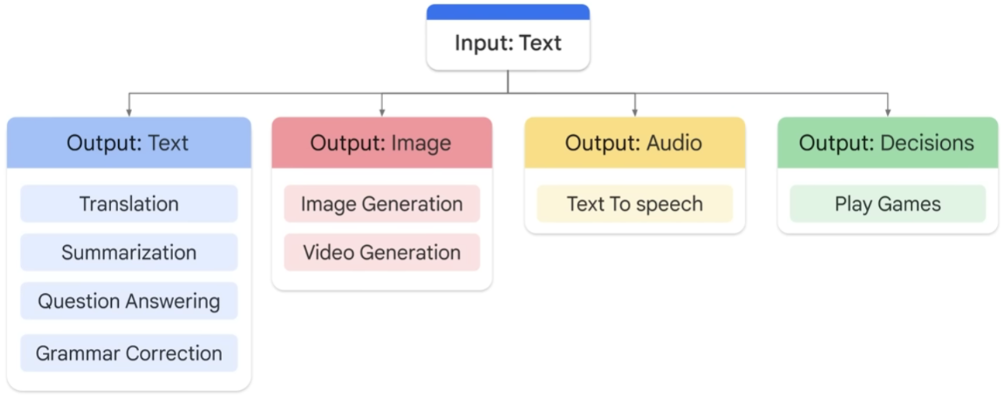

In [49]:
Image("local/imgs/Selección_047.png", width = 1000, height = 600)

## **Desafíos de la GenAI:**

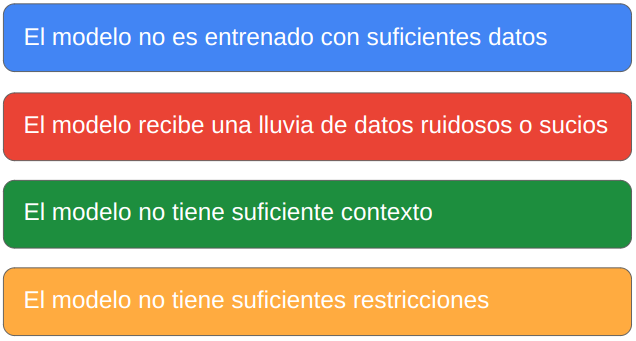

In [50]:
Image("local/imgs/Selección_048.png", width = 1000, height = 600)

## **Aplicaciones de la Gen AI**

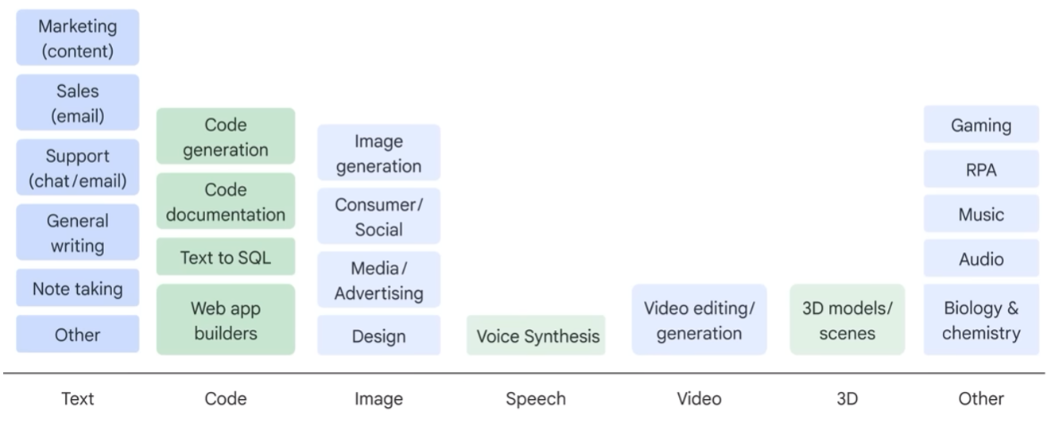

In [51]:
Image("local/imgs/Selección_049.png", width = 1000, height = 600)

----------------------------------------------------------------------------------------------------------------------------------------------

# **Tipos de problemas supervisados**

En general ${\bf{x}}_i$ puede representar un objeto complejo como una imagen, un video, una palabra, una frase, un mensaje de correo electrónico, un cliente de un crédito bancario, una serie de tiempo, una cadena de ADN, una molécula, un grafo, etc. En el aprendizaje supervisado, si la variable de salida $t_i$ toma valores discretos (es categórica), el problema de aprendizaje se conoce como <b>Clasificación</b>. 

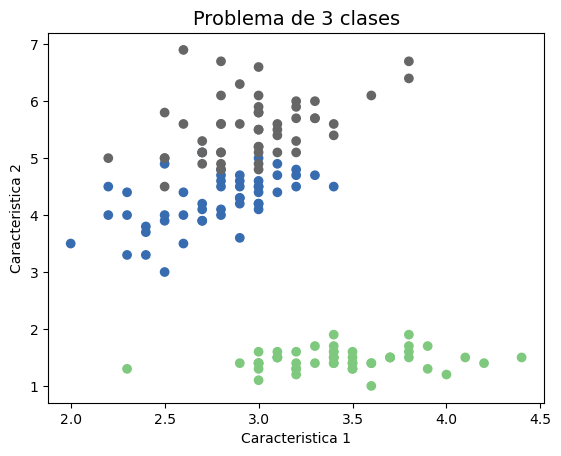

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,1], X[:,2],c=y,cmap="Accent")
plt.show() 

Si por el contrario $y_i$ toma valores reales, el problema se conoce como <b>Regresión</b>.

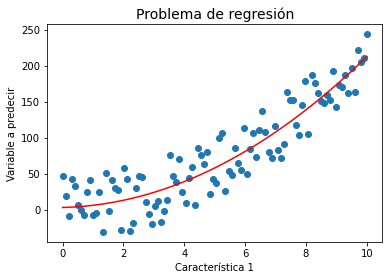

In [20]:
a = np.array([1, 2, 3])
x = np.linspace(0,10,100);
y1 = np.zeros(100)
y2 = np.zeros(100)
for i in range(len(x)):
    b = np.array([x[i],x[i]**2,1])
    y1[i] = sum(a*b +  30*(np.random.rand() - 0.5))
    y2[i] = sum(a*b)
plt.title(u'Problema de regresión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Variable a predecir')
plt.scatter(x, y1)
plt.plot(x,y2,'r')
plt.show()

## **Retos que deben ser enfrentados dentro del aprendizaje de máquina**

Cuando nos enfrentamos a un problema de aprendizaje vamos a encontrarnos con una serie de situaciones que harán la tarea un problema no trivial.

<b>Clasificación</b>
<li>Las clases son colecciones de objetos no necesariamente idénticos, entonces cada clase queda definida por las muestras con las que se cuente para entrenar el sistema </li>

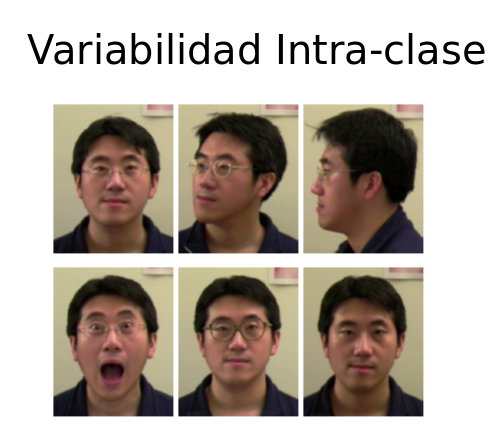

In [21]:
Image("local/imgs/ICVariability.png", width = 500)

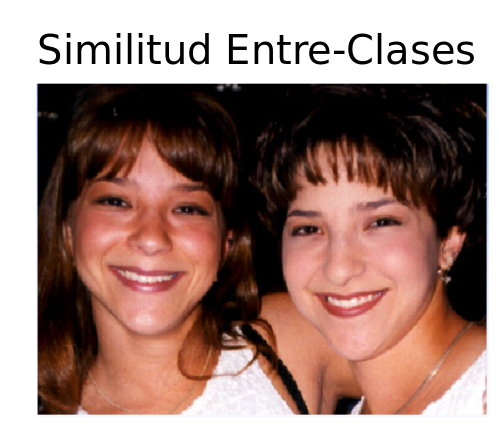

In [22]:
Image("local/imgs/ICSimilarity.png", width = 450)

----------------------------------------------------------------------------------------------------------------------------------------------

## **Diseño de un modelo de ML**

Cuando nos enfrentamos al problema de aprendizaje de máquina debemos responder a tres preguntas fundamentales:

* Cuál es el <b>modelo</b> que vamos a usar teniendo en cuenta el problema a resolver, es decir la estructura que tiene el conjunto de datos. Es importante tener en cuenta que todo modelo tiene parámetros que se deben ajustar para que pueda adaptarse ('aprender'), al problema particular que deseamos abordar.

$$ f({\bf{x}}) = {\bf{w}}^T{\bf{x}}$$


* Cuál es el <b>criterio</b> de ajuste del modelo que vamos a usar. Es decir, determinar qué es lo que queremos que haga el modelo con respecto al conjunto de muestras de entrenamiento y expresarlo a través de una función matemática. Típicamente se llama función de costo o de pérdida.

$$\min_{{\bf{w}}} \sum_{i=1}^N \left(y_i - f({\bf{x}}_i) \right)^2$$

* Cuál es y cómo funciona el <b>algoritmo</b> que encuentra los parámetros del modelo de acuerdo al criterio escogido. En la mayoría de los casos la ejecución del criterio de entrenamiento implica un procedimiento de maximización (o minimización) de la función de costo. Por consiguiente en esta etapa necesitamos aplicar un algoritmo que pueda solucionar el problema de optimización.

$$\bf{\text{Gradiente descendente}}$$



Como todo procedimiento de modelado, el aprendizaje de máquina debe pasar por etapas de verificación y validación que permitan establecer el correcto funcionamiento del modelo propuesto y cuantificar su desempeño en términos objetivos.

### Niveles de abstracción:

* **Alto nivel**: Selecciono un modelo (plantilla) que encaja en el problema que quiero resolver y uso una librería que tiene definido ya un criterio e implementado un algoritmo de entrenamiento. Me enfoco en ajustar el modelo a los datos y realizar el proceso de validación.
* **Nivel intermedio**: Selecciono un modelo pero quiero modificar la función de costo para el entrenamiento. Uso una librería de cálculo simbólico para la optimización de la nueva función.
* **Bajo nivel**: Selecciono el modelo el modelo y decido cambiar la función criterio y/o el algoritmo de optimización, o incluso hacer cambios en la formulación del modelo.

El último nivel es necesario sobre todo en casos en los que se abordan problemas avanzados en los que las soluciones predefinidas no son suficientes para alcanzar un solución satisfactoria.

## **Iniciando con scikit-learn train_test_split()**

Uno de los aspectos claves del aprendizaje de máquina supervisado es el modelo de evaluación y validación. Cuando se evalua el desempaño predictivo de un modelo, es esencial que el proceso sea insesgado. Usando train_test_split() de la librería scikit-learn, podemos dividir el dataset en subconjuntos que minimizan el potencial sesgo en el proceso de evaluación y validadción. 

## **La importancia de dividir la Data**

El aprendizaje de máquina supervisado es acerca de crear modelos que definen una función que recibe entradas (variables independientes o predictores) para generar salidas (variables dependientes o respuestas). 

Cómo medir la precisión del modelo depende del tipo de problema que se quiere resolver. En análisis de regresión, se usa tipicamente los coeficientes de determinación, error cuadrático medio, error absoluto o medidas similares. Para problemas de clasificación usualmente se aplica accuracy, precision, recall, F1-score y otros indicadores.

Lo más importante es comprender que, por lo general, necesita una evaluación insesgada para utilizar correctamente estas medidas, evaluar el rendimiento predictivo de su modelo y validar el modelo.

Esto significa que no se puede evaluar el rendimiento predictivo de un modelo con los mismos datos que se utilizó para el entrenamiento. Se debe evaluar el modelo con datos nuevos que el modelo no ha visto antes. Es posible lograrlo dividiendo el conjunto de datos antes de usarlo.

## **Conjuntos de training, validation y test**
 Dividir el dataset es esencial para una evaluación insesgada del rendimiento de la predicción. En la mayoría de los casos es suficiente con dividir el dataset de forma aleatoria en tres subconjuntos.

 1. El conjunto training es aplicado para entrenar o ajustar (fit) tu modelo. Por ejemplo, se puede usar el conjunto de entrenamiento para hallar los pesos óptimos o coeficientes para una regresión lineal, regresión logística o una red neuronal.

2. El conjunto validation es usado para la evaluación del modelo insesgado durante la determinación de los hiperparámetros. Por ejemplo, cuando se desea encontrar el número óptimo de neuronas en una red neuronal o el mejor kernel para una máquina de soporte vectorial, experimenta con diferentes valores. Para cada configuración considerada de hiperparámetros, ajusta el modelo con el conjunto de entrenamiento y evalúa su rendimiento con el conjunto de validación.

3. El conjunto test es necesario para la evaluación insesgada del modelo final. No se debe usar para ajustar o validar.

En casos poco complejos, cuando no se debe determinar los hiperparámetros, está bien trabajar con solamnete los conjuntos de train y test.


## **Aplicación de train_test_split()**

Necesitamos importar train_tet_split() y Numpy.

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

En aplicaciones de machine learning supervisado, se trabaja usualmente con dos tipos de sucesiones (arrays).

1. Un array $n$-dimensional con entradas x
2. Un array unidimensional con salidas y. Un array

* train_size es el número que define el tamaño del conjunto de entrenamiento. Si proporciona un float, debe estar entre 0.0 y 1.0 y definirá la parte del conjunto de datos que se usa para las pruebas. Si proporciona un int, entonces representará el número total de muestras de entrenamiento. El valor predeterminado es None.
* test_size es el número que define el tamaño del conjunto de prueba. Es muy similar a train_size. Debe proporcionar train_size o test_size. Si no se proporciona ninguno, entonces el porcentaje predeterminado del conjunto de datos que se utilizará para las pruebas es 0,25 o 25 por ciento.
* random_state es el objeto que controla la aleatorización durante la división. Puede ser un int o una instancia de RandomState. El valor predeterminado es None.
* shuffle es el objeto booleano (Verdadero por defecto) que determina si mezclar el conjunto de datos antes de aplicar la división.
* stratify es un objeto similar a una matriz que, si no es None, determina cómo utilizar una división estratificada.



## ¡Practiquemos!

In [24]:
np.random.seed(123)
x = np.arange(1,31).reshape(15,2)
y = np.random.randint(0, 2, size = 15)
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24],
       [25, 26],
       [27, 28],
       [29, 30]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Ahora usemos los parámetros train_size y test_size

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train

array([[13, 14],
       [19, 20],
       [25, 26],
       [ 7,  8],
       [29, 30],
       [ 1,  2],
       [17, 18],
       [ 9, 10],
       [ 5,  6],
       [15, 16]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train

array([[17, 18],
       [ 5,  6],
       [ 3,  4],
       [29, 30],
       [ 9, 10],
       [15, 16],
       [21, 22],
       [25, 26],
       [ 7,  8],
       [13, 14]])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
x_train

array([[ 9, 10],
       [19, 20],
       [13, 14],
       [27, 28],
       [21, 22],
       [ 1,  2],
       [11, 12],
       [ 7,  8],
       [17, 18],
       [ 3,  4],
       [ 5,  6],
       [23, 24]])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)
x_train

array([[27, 28],
       [11, 12],
       [17, 18],
       [ 5,  6],
       [ 3,  4],
       [29, 30],
       [ 9, 10],
       [15, 16],
       [21, 22],
       [25, 26],
       [ 7,  8],
       [13, 14]])

In [30]:
y_train, y_test

(array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]), array([0, 1, 0]))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42, stratify = y)
y_train, y_test

(array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1]), array([1, 0, 0, 1, 0]))

## **Ejemplo**

Vamos a generar datos de forma artificial.

In [32]:
np.random.seed(123)
X = np.arange(1,51)
y = 2*X + 5*np.random.normal(0,1,50) + 4

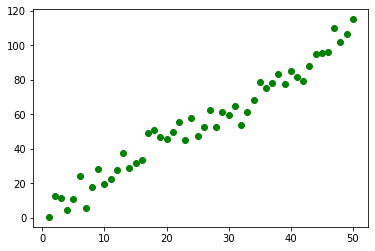

In [33]:
plt.scatter(X,y, c = 'g');

Inicialmente vamos a entrenar un modelo lineal con los datos completos.

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
X, Y = X.reshape((-1,1)), y.reshape((-1,1))
lr.fit(X,y)

LinearRegression()

Ahora determinamos los parémetros del modelo (en este caso un modelo lineal).

In [36]:
lr.coef_, lr.intercept_

(array([2.03894448]), 3.073272927423183)

In [37]:
lr.predict(np.array([[60]]))

array([125.40994182])

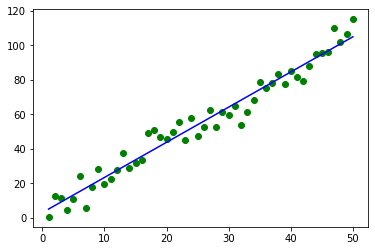

In [38]:
x = np.arange(1,51)
y_m = lr.coef_*x + lr.intercept_
plt.plot(x,y_m, c = 'b')
plt.scatter(X,y, c = 'g');

Ahora vamos a utilizar dividir el dataset en conjunto train y conjunto test.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 1), (15, 1), (35,), (15,))

In [41]:
lrs = LinearRegression()

In [42]:
lrs.fit(X_train, y_train)
lrs.coef_, lr.intercept_


(array([2.04449513]), 3.073272927423183)

In [43]:
lrs.score(X_train, y_train)


0.9596907167237203

In [44]:
lrs.score(X_test, y_test)

0.9640318879272959

In [45]:
lrs.predict(np.array([[60]]))

array([125.21959233])

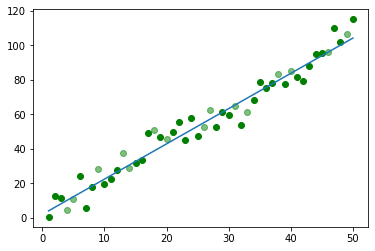

In [46]:
x = np.arange(1,51)
y_ms = lrs.coef_*x + lrs.coef_
plt.plot(x, y_ms)
plt.scatter(X_train, y_train, c = 'g')
plt.scatter(X_test, y_test, c = 'g', alpha = 0.5);

## **Ejercicio**
Vamos a trabajar con la base de datos de scikit-learn Boston

In [47]:
import pandas as pd

df = pd.read_csv('local/data/boston.csv')

x = df.drop('MEDV', axis = 1).values
y = df['MEDV'].values

Dividir el conjunto de datos en train y test con una partición del 30 % para el conjunto test y un estado aleatorio de 42.

In [48]:
x_train, ...

(array([[25, 26],
        [ 3,  4],
        [21, 22],
        [ 1,  2],
        [ 5,  6],
        [29, 30],
        [ 7,  8],
        [13, 14],
        [23, 24],
        [15, 16]]),
 Ellipsis)

Aplicar un modelo de regresión lineal para ajustar el modelo con el conjunto de entrenamiento, hallar los parámetros del modelo.

In [ ]:
from sklearn.linear_model ...

## **Bibliografía**

[1] Bishop, C.M. Pattern Recognition and Machine Learning. Springer, 2006.

[2] Webb, A. R. Statistical pattern recognition. John Wiley & Sons, 2003.